## VARIABLE SELECTION ON LOAN DATATSET

This analysis involves a **Personal_Loans** dataset which contains Data of Bank Customers. The data includes basic information of each customer as well as whether the customer took out a loan and the size of that loan.

## Introduction

**These Factors involved** are the variables of the dataset. The **quality of the variables** present within this dataset has a direct impact on the outcome of the **Loan Size** a person takes. 

We will first select the relevant factors that influence Size of a Loan,

Then,

We will use regression techniques to build the associations between these chosen variables. 

> This Variable selection will involve the **elimination of some factors** which may, in turn, reduce the computational cost of modelling and, improve the performance of this model. 


### Import dataset and libraries

Let's **import** a few Python libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

We will be using the `personal_loans` dataset which contains data of **bank customers**. The data include basic information of each customer as well as whether the customer took out a loan and the size of that loan.

The basic information consists of:
* **Age** – the customer's age in years. 
* **Experience** – working experience in years.
* **Income** – annual income expressed in multiples of 1000.
* **Family** – members in the family, including the customer self.
* **CCAvg** – average monthly spend on credit card.
* **Education** – undergrad/postgrad/professional.
* **Mortgage** – amount expressed in multiples of 1000.
* **Securities Account** – whether the customer has a securities account.
* **CD Account** – whether the customer has a cash deposit account.
* **Online** – whether the customer is using online banking.
* **Gender** – male/female.
* **Area** – geographic area where the customer lives. 
* **Personal Loan** – whether the person took out a personal loan.
* **Loan Size** – amount expressed in multiples of  1000.

We will **load our data** as a Pandas DataFrame:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/bootcamps/Personal_Loans.csv')
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,Gender,Area,Personal Loan,Loan Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,67,41,78,4,2.4,Professional,0,1,0,0,Male,Santa Clara,0,0
4842,67,43,79,4,1.7,Postgrad,215,0,1,1,Male,Yolo,0,0
4843,67,43,105,4,1.7,Postgrad,0,0,0,1,Female,Fresno,0,0
4844,67,41,112,1,2.0,Undergrad,0,1,0,0,Female,Los Angeles,0,0


### Pre-processing

With our data loaded, we now consider doing some preliminary data preprocessing. 

Some of the **columns have white space** that we want to replace with an underscore (to avoid using the column names as variable names later on).

In [3]:
df.columns = [col.replace(" ","_") for col in df.columns]
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Gender,Area,Personal_Loan,Loan_Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,67,41,78,4,2.4,Professional,0,1,0,0,Male,Santa Clara,0,0
4842,67,43,79,4,1.7,Postgrad,215,0,1,1,Male,Yolo,0,0
4843,67,43,105,4,1.7,Postgrad,0,0,0,1,Female,Fresno,0,0
4844,67,41,112,1,2.0,Undergrad,0,1,0,0,Female,Los Angeles,0,0


If we want to build some relationship between variables that are likely to indicate the loan amount once someone has taken a loan, we really only want to **consider customers who actually took a personal loan** to build this relationship:

In [4]:
#We only select the people who actually took out a loan, excluding those who didn't:
df = df.drop('Personal_Loan', axis =1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Gender,Area,Loan_Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,67,41,78,4,2.4,Professional,0,1,0,0,Male,Santa Clara,0
4842,67,43,79,4,1.7,Postgrad,215,0,1,1,Male,Yolo,0
4843,67,43,105,4,1.7,Postgrad,0,0,0,1,Female,Fresno,0
4844,67,41,112,1,2.0,Undergrad,0,1,0,0,Female,Los Angeles,0


## 1. Variable types and summary statistics

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://raw.githubusercontent.com/Explore-AI/Pictures/master/Variable_data_types.jpg')

Let's look at the **data types and number of entries** of each column in our dataset:

In [6]:
#Investigating number of non-null entries in each column, and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4846 non-null   int64  
 1   Experience          4846 non-null   int64  
 2   Income              4846 non-null   int64  
 3   Family              4846 non-null   int64  
 4   CCAvg               4846 non-null   float64
 5   Education           4846 non-null   object 
 6   Mortgage            4846 non-null   int64  
 7   Securities_Account  4846 non-null   int64  
 8   CD_Account          4846 non-null   int64  
 9   Online              4846 non-null   int64  
 10  Gender              4846 non-null   object 
 11  Area                4846 non-null   object 
 12  Loan_Size           4846 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 492.3+ KB


**Note:** `df.info()` specifically outputs the number of non-null entries in each column. As such, we can be certain that our data have missing values if columns have a varying number of non-null entries.  

Now let's look at a table showcasing the **summary statistics** of the data.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4846.0,45.388981,11.423346,23.0,35.0,45.0,55.0,67.0
Experience,4846.0,20.169212,11.363324,0.0,10.0,20.0,30.0,43.0
Income,4846.0,73.995047,46.017608,8.0,39.0,64.0,98.0,224.0
Family,4846.0,2.395378,1.143967,1.0,1.0,2.0,3.0,4.0
CCAvg,4846.0,1.942984,1.745590,0.0,0.7,1.6,2.5,10.0
Mortgage,4846.0,56.936236,102.061477,0.0,0.0,0.0,101.0,635.0
Securities_Account,4846.0,0.104003,0.305296,0.0,0.0,0.0,0.0,1.0
CD_Account,4846.0,0.060050,0.237603,0.0,0.0,0.0,0.0,1.0
Online,4846.0,0.598019,0.490349,0.0,0.0,1.0,1.0,1.0
Loan_Size,4846.0,3.229880,10.303425,0.0,0.0,0.0,0.0,50.0


Based on the means and standard deviations of different columns, we may want to consider **standardizing** our data. 

**Standardizing** is the process of putting different variables on the same scale.

## 2. Dummy variable encoding

As observed in the above table, we get little information from the summary statistics of our numerical categorical data (`Online`, `CD_Account`, `Securities_Account`).

More importantly, **all input data for regression model** building purposes **need to be numerical**. 

We, therefore, have to **transform the text data** (found within columns such as `Education`, `Gender`, and `Area`) **into numbers** before we can train our machine learning model. 

To facilitate this transformation from textual-categorical data to numerical equivalents, we **use the Pandas method** called `get_dummies`. 

`get_dummies` will transform all the categorical text data into numbers by adding a **column for each distinct category**. The new column has:
- `1` for observations that **were** in this category.
- `0` for observations that **were** not in this category.

For example, the DataFrame:

| Dog Age | Breed      |
|---------|------------|
| 15      | "Bulldog"  |
| 12      | "Labrador" |
| 10      | "Labrador" |
| 22      | "Beagle"   |
| 9       | "Labrador" |


After `pd.dummies` becomes:

| Dog Age | Breed_Labrador | Breed_Bulldog | Breed_Beagle |
|---------|----------------|---------------|--------------|
| 15      | 1              | 0             | 0            |
| 12      | 0              | 1             | 0            |
| 10      | 1              | 0             | 0            |
| 22      | 0              | 0             | 1            |
| 9       | 1              | 0             | 0            |



Let's see what this process looks like with our personal loans dataset:

In [10]:
#Dummy Variable Encoding:
df_dummies = pd.get_dummies(df)


#Ensuring all the column names have underscores instead of whitespaces:
df_dummies.columns= [col.replace(" ","_") for col in df_dummies.columns]
df_dummies.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Loan_Size,...,Area_Santa_Cruz,Area_Shasta,Area_Siskiyou,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Trinity,Area_Tuolumne,Area_Ventura,Area_Yolo
0,26,2,60,2,3.0,132,0,0,0,15,...,False,False,False,False,False,False,False,False,False,False
1,26,0,83,3,3.9,0,0,0,1,30,...,False,False,False,False,False,False,False,False,True,False
2,26,0,129,3,0.7,0,0,0,0,33,...,False,False,False,False,False,False,False,False,False,False
3,26,0,132,3,6.5,0,0,0,0,40,...,False,False,False,False,False,False,False,False,False,False
4,26,2,132,2,2.4,0,0,0,0,35,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Dummy variable encoding our dataset

df_dummies = pd.get_dummies(df)

# Again we make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns] 

df_dummies.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Loan_Size,...,Area_Santa_Cruz,Area_Shasta,Area_Siskiyou,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Trinity,Area_Tuolumne,Area_Ventura,Area_Yolo
0,26,2,60,2,3.0,132,0,0,0,15,...,False,False,False,False,False,False,False,False,False,False
1,26,0,83,3,3.9,0,0,0,1,30,...,False,False,False,False,False,False,False,False,True,False
2,26,0,129,3,0.7,0,0,0,0,33,...,False,False,False,False,False,False,False,False,False,False
3,26,0,132,3,6.5,0,0,0,0,40,...,False,False,False,False,False,False,False,False,False,False
4,26,2,132,2,2.4,0,0,0,0,35,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#df_dummies.shape
df_dummies.shape

(4846, 53)

Suddenly we have many more variable columns – our **original 13 variable columns** are **now 44** given the dummy variable encoding. 

## 3. Correlations and model structure

Using the dummy variable DataFrame, we can build a model that predicts `Loan_Size` (our dependent variable) as a function of **43 different independent variables**.

Before we do this, we **reorder columns** so that our dependent variable is the last column of the DataFrame: 

In [13]:
column_titles = [col for col in df_dummies.columns if col!= 'Loan_Size'] + ['Loan_Size']
df_dummies = df_dummies.reindex(columns=column_titles)
df_dummies

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Postgrad,...,Area_Shasta,Area_Siskiyou,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Trinity,Area_Tuolumne,Area_Ventura,Area_Yolo,Loan_Size
0,26,2,60,2,3.0,132,0,0,0,False,...,False,False,False,False,False,False,False,False,False,15
1,26,0,83,3,3.9,0,0,0,1,True,...,False,False,False,False,False,False,False,True,False,30
2,26,0,129,3,0.7,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,33
3,26,0,132,3,6.5,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,40
4,26,2,132,2,2.4,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,67,41,78,4,2.4,0,1,0,0,False,...,False,False,False,False,False,False,False,False,False,0
4842,67,43,79,4,1.7,215,0,1,1,True,...,False,False,False,False,False,False,False,False,True,0
4843,67,43,105,4,1.7,0,0,0,1,True,...,False,False,False,False,False,False,False,False,False,0
4844,67,41,112,1,2.0,0,1,0,0,False,...,False,False,False,False,False,False,False,False,False,0


In [14]:
column_titles = [col for col in df_dummies.columns if col != 'Loan_Size'] + ['Loan_Size'] 
df_dummies = df_dummies.reindex(columns=column_titles)
df_dummies

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Postgrad,...,Area_Shasta,Area_Siskiyou,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Trinity,Area_Tuolumne,Area_Ventura,Area_Yolo,Loan_Size
0,26,2,60,2,3.0,132,0,0,0,False,...,False,False,False,False,False,False,False,False,False,15
1,26,0,83,3,3.9,0,0,0,1,True,...,False,False,False,False,False,False,False,True,False,30
2,26,0,129,3,0.7,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,33
3,26,0,132,3,6.5,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,40
4,26,2,132,2,2.4,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,67,41,78,4,2.4,0,1,0,0,False,...,False,False,False,False,False,False,False,False,False,0
4842,67,43,79,4,1.7,215,0,1,1,True,...,False,False,False,False,False,False,False,False,True,0
4843,67,43,105,4,1.7,0,0,0,1,True,...,False,False,False,False,False,False,False,False,False,0
4844,67,41,112,1,2.0,0,1,0,0,False,...,False,False,False,False,False,False,False,False,False,0


### Creating and Visualising the Correlation matrix

This makes a **heatmap visualisation** representing a **correlation matrix** of our data easier to interpret:

In [15]:
# The correlation matrix - correlation coefficient of each predictor variable with another
df_dummies.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Postgrad,...,Area_Shasta,Area_Siskiyou,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Trinity,Area_Tuolumne,Area_Ventura,Area_Yolo,Loan_Size
Age,1.000000,0.988476,-0.055332,-0.048051,-0.051714,-0.013684,-0.004501,0.009263,0.015908,-0.018594,...,0.005618,-0.008392,-0.005899,0.021722,-0.031106,0.002167,-0.003768,0.023800,-0.012481,-0.017247
Experience,0.988476,1.000000,-0.047307,-0.052177,-0.048606,-0.014251,-0.003943,0.012671,0.013099,-0.018696,...,0.006181,-0.007238,-0.005026,0.021333,-0.031320,0.002102,-0.003623,0.022728,-0.014231,-0.017268
Income,-0.055332,-0.047307,1.000000,-0.156079,0.644302,0.210611,0.000521,0.169919,0.015187,-0.126113,...,0.005468,-0.014407,-0.022694,-0.000775,-0.000948,-0.002339,-0.031242,-0.001007,-0.027697,0.515645
Family,-0.048051,-0.052177,-0.156079,1.000000,-0.106280,-0.020653,0.020524,0.014386,0.009639,0.141155,...,0.031363,0.003220,0.000775,0.015329,-0.003976,0.015193,0.008351,0.000616,0.034190,0.067339
CCAvg,-0.051714,-0.048606,0.644302,-0.106280,1.000000,0.114429,0.017636,0.135701,-0.005369,-0.086975,...,0.017335,-0.016333,-0.000110,0.023888,-0.000592,0.006702,-0.026082,-0.003594,-0.020055,0.398250
Mortgage,-0.013684,-0.014251,0.210611,-0.020653,0.114429,1.000000,-0.005941,0.091747,-0.002587,-0.035133,...,0.010263,0.003012,-0.009961,0.008713,0.008047,-0.016036,0.010257,0.000245,-0.002167,0.065089
Securities_Account,-0.004501,-0.003943,0.000521,0.020524,0.017636,-0.005941,1.000000,0.317923,0.009097,0.002249,...,0.025518,-0.011996,0.022300,0.019906,-0.004601,-0.009792,0.007228,-0.015614,-0.009748,0.024090
CD_Account,0.009263,0.012671,0.169919,0.014386,0.135701,0.091747,0.317923,1.000000,0.173568,0.007502,...,0.043766,-0.008899,0.000841,0.039426,0.003684,-0.007265,-0.008899,0.002301,0.001699,0.296944
Online,0.015908,0.013099,0.015187,0.009639,-0.005369,-0.002587,0.009097,0.173568,1.000000,0.020721,...,0.013053,0.016898,-0.011103,0.010480,0.001837,-0.005746,0.016898,0.014745,0.019562,0.004077
Education_Postgrad,-0.018594,-0.018696,-0.126113,0.141155,-0.086975,-0.035133,0.002249,0.007502,0.020721,1.000000,...,-0.021322,0.017370,0.023176,0.027653,0.003343,-0.001845,0.004283,-0.008239,0.003775,0.077119


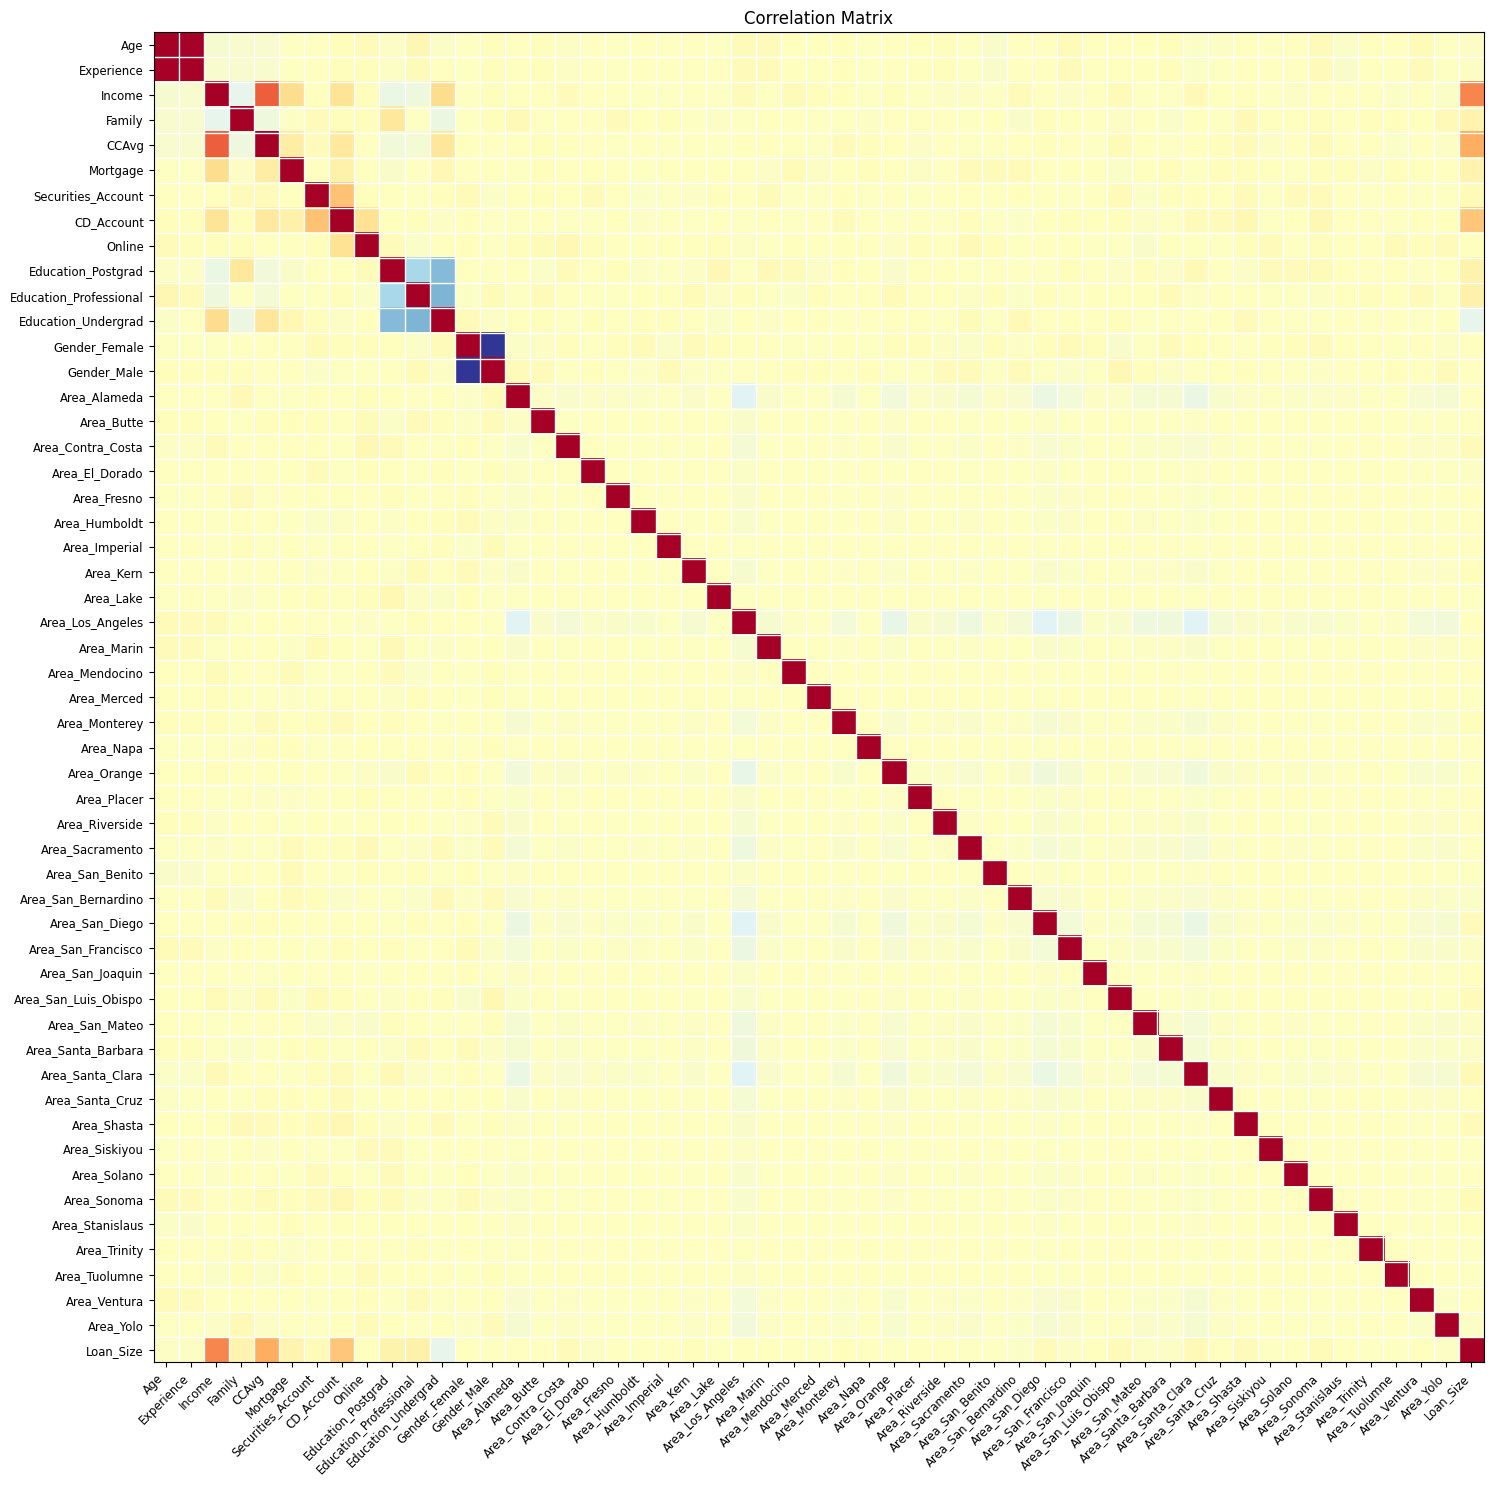

In [16]:
# The correlation heatmap
from statsmodels.graphics.correlation import plot_corr


fig = plt.figure(figsize=(15,15)) 
ax = fig.add_subplot(111) 
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

We can see from the correlations that it's not the best idea to keep all of the dummy variables.

If we use all of these variables, we're effectively working with **superfluous or redundant information**. 

Our model will also have **collinearity issues**:

- `Gender_Male` and `Gender_Female` are perfectly negatively correlated.

This will likely be a problem when we build a model.

In [17]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = df_dummies.copy()

# The dependent variable:
y_name = 'Loan_Size'

# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 Loan_Size ~ Age + Experience + Income + Family + CCAvg + Mortgage + Securities_Account + CD_Account + Online + Education_Postgrad + Education_Professional + Education_Undergrad + Gender_Female + Gender_Male + Area_Alameda + Area_Butte + Area_Contra_Costa + Area_El_Dorado + Area_Fresno + Area_Humboldt + Area_Imperial + Area_Kern + Area_Lake + Area_Los_Angeles + Area_Marin + Area_Mendocino + Area_Merced + Area_Monterey + Area_Napa + Area_Orange + Area_Placer + Area_Riverside + Area_Sacramento + Area_San_Benito + Area_San_Bernardino + Area_San_Diego + Area_San_Francisco + Area_San_Joaquin + Area_San_Luis_Obispo + Area_San_Mateo + Area_Santa_Barbara + Area_Santa_Clara + Area_Santa_Cruz + Area_Shasta + Area_Siskiyou + Area_Solano + Area_Sonoma + Area_Stanislaus + Area_Trinity + Area_Tuolumne + Area_Ventura + Area_Yolo


In [19]:
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.75
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:09:32   Log-Likelihood:                -16904.
No. Observations:                4846   AIC:                         3.391e+04
Df Residuals:                    4796   BIC:                         3.423e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### Fitting the model

In [17]:
# Fit the model using the model DataFrame
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())  

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     37.56
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          1.71e-115
Time:                        11:43:31   Log-Likelihood:                -1387.0
No. Observations:                 471   AIC:                             2856.
Df Residuals:                     430   BIC:                             3026.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

We can see that there is a warning about strong multicollinearity. This is likely as a result of the incorrect filtering of hot-encoded dummy variables (we noticed earlier that `Gender_Male` and `Gender_Female` are perfectly negatively correlated).

### Repeat dummy variable encoding with `drop_first` parameter

In order to ensure that we don't assume an underlying relationship between the categories, we can call `pd.get_dummies` with the argument `drop_first=True` so that we only create **n-1** columns for each variable with **n** categories (i.e. one variable/column with five categories will be transformed into four columns of 0's and 1's). 

In [20]:
df_dummies = pd.get_dummies(df, drop_first=True)


df_dummies.columns = [col.replace(" ", "_") for col in df_dummies.columns]


# Reordering columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in df_dummies.columns if col !=
                 'Loan_Size'] + ['Loan_Size']
df_dummies = df_dummies.reindex(columns=column_titles)  #reordering the columns

df_dummies.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Professional,...,Area_Shasta,Area_Siskiyou,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Trinity,Area_Tuolumne,Area_Ventura,Area_Yolo,Loan_Size
0,26,2,60,2,3.0,132,0,0,0,False,...,False,False,False,False,False,False,False,False,False,15
1,26,0,83,3,3.9,0,0,0,1,False,...,False,False,False,False,False,False,False,True,False,30
2,26,0,129,3,0.7,0,0,0,0,False,...,False,False,False,False,False,False,False,False,False,33
3,26,0,132,3,6.5,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,40
4,26,2,132,2,2.4,0,0,0,0,True,...,False,False,False,False,False,False,False,False,False,35


In [19]:
df_dummies.shape

(471, 41)

We now have **41** columns instead of **44**. This gives us 40 potential independent variables that could be used to build a relationship on `Loan_Size`.

### OLS fit summary

Let's check what the OLS model summary would say if we now **fit only the 41 variable columns**.

In [23]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in df_dummies.columns if col != y_name]


# Building the OLS formula string " y ~ X "
formula_str = y_name+' ~ '+'+'.join(X_names)

# Fitting the model using the model DataFrame
model = ols(formula=formula_str, data=df_dummies)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.75
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:13:26   Log-Likelihood:                -16904.
No. Observations:                4846   AIC:                         3.391e+04
Df Residuals:                    4796   BIC:                         3.423e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

We see that the **condition number** has improved, but there is still mention of strong multicollinearity in warning **\[2\]**.

We also see that the Q1 – Q3 range of coefficients and expected errors are larger than the absolute size of the coefficients themselves.

Let's make further selections on the variables now using their significance.

## 4. Variable selection by correlation and significance

We now have 40 predictor variables to choose from, so we need a way of guiding us to **choose the best ones** to be our predictors. 

One way is to look at the **correlations** between the **`Loan Size` and each variable** in our DataFrame and select those with the **strongest correlations** – both positive and negative.

We also need to consider **how significant** those features are. 

### Calculating correlation coefficients and p-values

The code below will create a new DataFrame and store the correlation coefficients and p-values in that DataFrame for reference.

In [24]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['Loan_Size'].sort_values(ascending=False)
corrs

Loan_Size                 1.000000
Income                    0.515645
CCAvg                     0.398250
CD_Account                0.296944
Education_Professional    0.091847
Family                    0.067339
Mortgage                  0.065089
Area_Santa_Clara          0.038019
Area_Sonoma               0.029814
Securities_Account        0.024090
Area_Contra_Costa         0.021899
Area_Shasta               0.019341
Area_San_Diego            0.017113
Area_San_Luis_Obispo      0.016299
Area_Kern                 0.014590
Area_Monterey             0.009898
Area_Ventura              0.007358
Area_Marin                0.004675
Online                    0.004077
Area_San_Joaquin          0.003724
Area_Los_Angeles          0.002802
Area_Santa_Cruz           0.002504
Area_Stanislaus           0.000004
Area_Mendocino           -0.000414
Area_Solano              -0.002067
Area_Fresno              -0.002736
Area_Riverside           -0.002958
Area_Humboldt            -0.003303
Area_Butte          

Using [Pearson regression](http://sites.utexas.edu/sos/guided/inferential/numeric/bivariate/cor/) from SciPy:

In [25]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Loan_Size']

for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Loan_Size'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Income,0.515645,0.000000
Education_Professional,0.091847,0.000000
Education_Undergrad,-0.154798,0.000000
CCAvg,0.398250,0.000000
CD_Account,0.296944,0.000000
Family,0.067339,0.000003
Mortgage,0.065089,0.000006
Area_Santa_Clara,0.038019,0.008123
Area_San_Bernardino,-0.030833,0.031848
Area_Sonoma,0.029814,0.037954


Now, we've got a **sorted list of the p-values and correlation coefficients** for each of the features, when considered on their own. 

### Keeping the statistically significant features

If we were to use a logic test with a significance value of 5% (**p-value < 0.05**), we could infer that the following features are statistically significant:

* Income
* Mortgage
* CCAvg
* Experience
* Age
* Education_Undergrad
* Family

Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame `X`:

In [26]:
# The dependent variable remains the same:
y_name = 'Loan_Size'
y_data = df_dummies[y_name]  # y_name = 'Loan_Size'
y_data = df_dummies['Loan_Size'] 

# Model building – Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names] 
X_data

,Income,CCAvg,CD_Account,Education_Professional,Family,Mortgage,Area_Santa_Clara,Area_Sonoma,Area_San_Bernardino,Education_Undergrad
0,60,3.0,0,False,2,132,False,False,False,True
1,83,3.9,0,False,3,0,False,False,False,False
2,129,0.7,0,False,3,0,False,False,False,False
3,132,6.5,0,True,3,0,False,False,False,False
4,132,2.4,0,True,2,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4841,78,2.4,0,True,4,0,True,False,False,False
4842,79,1.7,1,False,4,215,False,False,False,False
4843,105,1.7,0,False,4,0,False,False,False,False
4844,112,2.0,0,False,1,0,False,False,False,True


### Finding and removing the highly correlated features

We also need to look for predictor variable pairs which have a **high correlation with each other** to avoid **autocorrelation**.

In [27]:
# Create the correlation matrix
corr = X_data.corr()
#corr

#Rows and Columns where correlation coefficients > 0.9 or <-0.9
[np.abs(corr) > 0.9]

[                        Income  CCAvg  CD_Account  Education_Professional  \
 Income                    True  False       False                   False   
 CCAvg                    False   True       False                   False   
 CD_Account               False  False        True                   False   
 Education_Professional   False  False       False                    True   
 Family                   False  False       False                   False   
 Mortgage                 False  False       False                   False   
 Area_Santa_Clara         False  False       False                   False   
 Area_Sonoma              False  False       False                   False   
 Area_San_Bernardino      False  False       False                   False   
 Education_Undergrad      False  False       False                   False   
 
                         Family  Mortgage  Area_Santa_Clara  Area_Sonoma  \
 Income                   False     False             False     

Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high – **greater than 0.9 or less than 0.9**:

In [28]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off-diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off-diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

""


Okay, so it looks like `Age` and `Experience` are highly correlated (perhaps unsurprising if you take a moment to think about it).

This is also visible looking back at the correlation coefficient heatmap and matrix from earlier, but a more focused / subset view of the matrix is useful to isolate the coefficients of interest.

Considering which predictor variable to drop, `Experience` is slightly **better correlated** (and lower p-value) **to the dependent variable** `Loan Size`, so **let's drop** `Age` from the feature DataFrame.

### OLS fit summary

Now let's see what the resulting OLS fit summary says:

In [29]:
# Let's take a new subset of our potential independent variables
X_remove = ['Age']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	Loan_Size ~ Income + CCAvg + CD_Account + Education_Professional + Family + Mortgage + Area_Santa_Clara + Area_Sonoma + Area_San_Bernardino + Education_Undergrad


In [30]:
# Fit the OLS model using the model DataFrame
from statsmodels.formula.api import ols

model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     326.1
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:14:04   Log-Likelihood:                -16930.
No. Observations:                4846   AIC:                         3.388e+04
Df Residuals:                    4835   BIC:                         3.395e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>